In [180]:
%matplotlib inline
# packages for analyses
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [181]:
# Lets takea look at the infamous rosenbrock equation

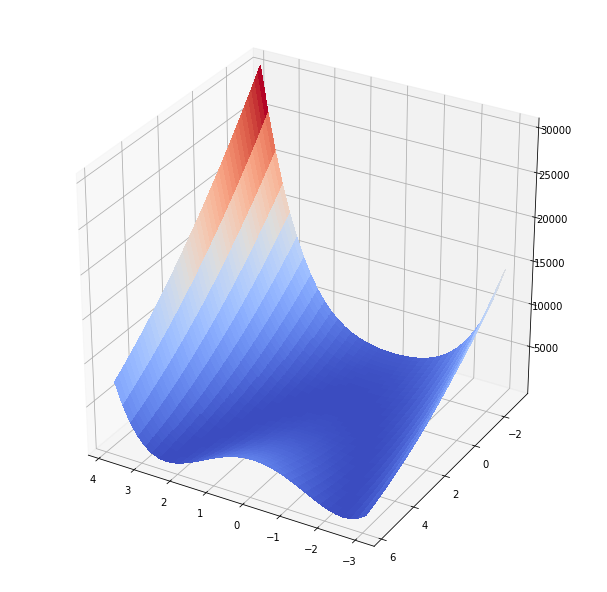

In [182]:
fig = plt.figure(figsize=(10.5, 10.5))
#fig.set_size_inches(9.5, 9.5)
ax = fig.gca(projection='3d')
# change the azimuth
ax.view_init(azim=120)

# Make data.
X = np.arange(-3, 4, .2)
Y = np.arange(-3, 6, .2)
X, Y = np.meshgrid(X, Y)
# our rosenbrock function
Z = 100 * (Y - X**2) **2 + (1 - X)**2

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       antialiased=False)


In [183]:
# Peeps like to use this function for checking the efficiency of optimzation algorithms.
# right at the location [1,1] is the global minimum for the function. The Global 
# minimum is a very steep, narrow valley, making it particualry hard to find 
# for some optimization algorithms. Let's get a better look

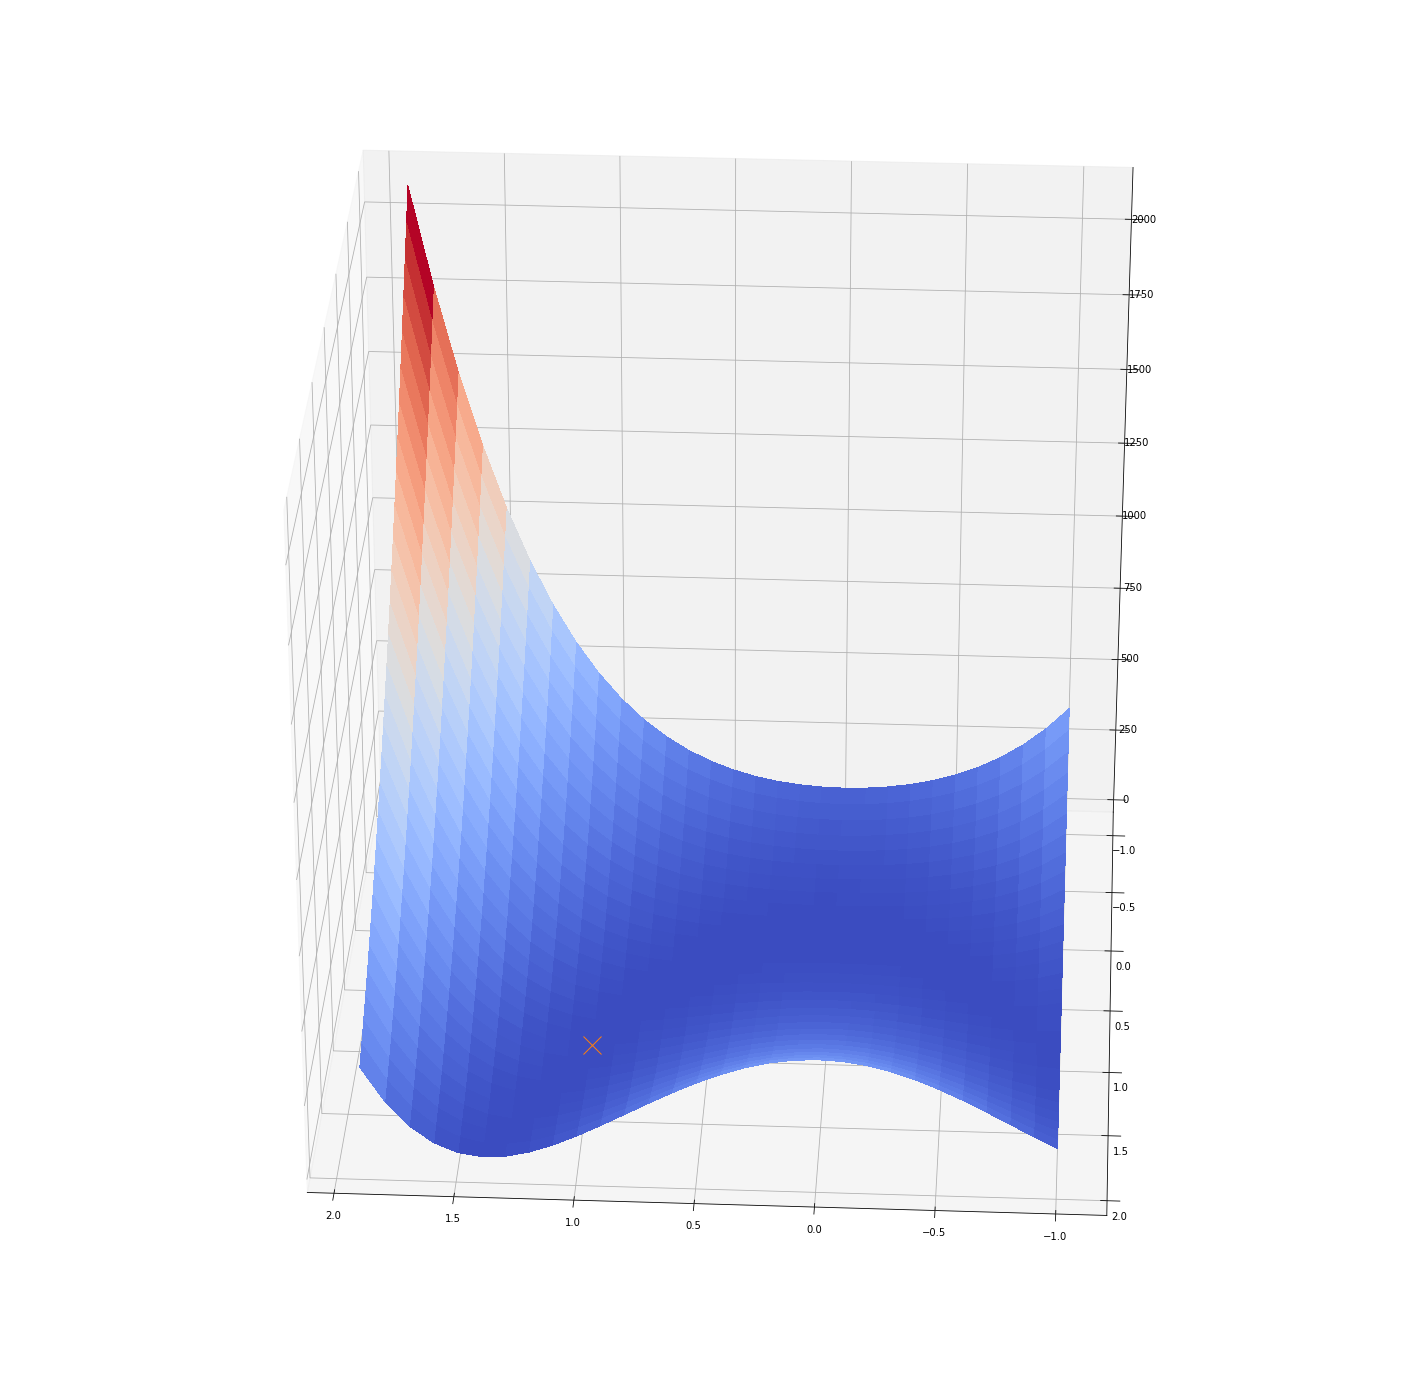

In [184]:
fig = plt.figure(figsize=(25, 25))
ax = fig.gca(projection='3d')
# change the azimuth
ax.view_init(azim=93)

# Make data.
X = np.arange(-1, 2, .1)
Y = np.arange(-1, 2, .1)
X, Y = np.meshgrid(X, Y)
# our rosenbrock function
Z = 100 * (Y - X**2) **2 + (1 - X)**2

# Plot the surface.
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       antialiased=False)
ax.plot([1],[1],[0], marker = 'x',markersize=18)


# the red X is our functions minimum!!!

In [185]:
# Say we want to find the minimum of this function, but we do not know the exact
# location of the global minimum. How in the dickinson are we supposed to find it?
# well, thanks to our hombre, calculus, we can use optimization techniques.
# lets start with good ol' gradient descent. first lets initialize our 
# starting value, x.
x = 9   # this value means we will start at value x1 = 9 and x2 = 9

# now lets initialize our alpha, this will be multiplied by our first derivative,
# essientally scaling our direction down by this number. lets go ahead and pick 
# a really small value. I'll explain why after we run this block.
alpha = 0.000001

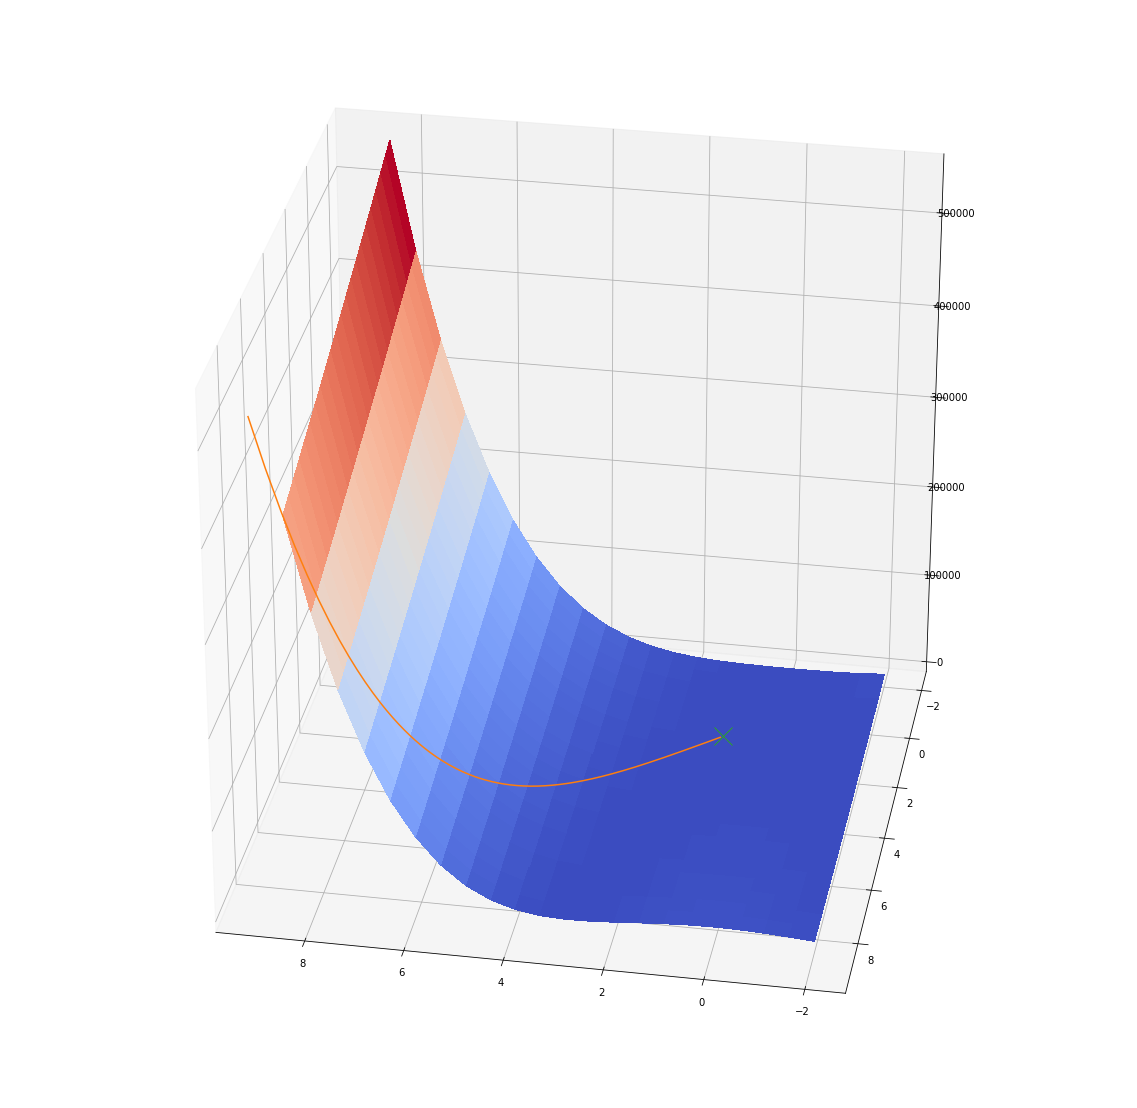

In [186]:

difference = 10  
"""the below lines of code plotthe function"""    
fig = plt.figure(figsize=(20, 20))
ax = fig.gca(projection='3d')
"""changes the azimuth"""
ax.view_init(azim=100)

"""Make data for rosenbrock equation"""
X = np.arange(-2, 9, .5)
Y = np.arange(-2, 9, .5)
X, Y = np.meshgrid(X, Y)
Z = 100 * (Y - X**2) **2 + (1 - X)**2

"""Plot the surface of rosenbrock equation, with our data"""
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       antialiased=False)

    
"""instantiate first order derivative with our initial starting point, x"""
first_order = 400 * x**3 - 600 * x **2 + 202 * x - 2    
li = []

while difference > 10**-5:
    li.append(x)
    x = x - alpha * first_order
    first_order = 400 * x**3 - 600 * x **2 + 202 * x - 2        
    difference = abs(x - (x - alpha * (first_order)) )       
global x_values1  
"""This variable is our gradient path in both the x and y direction in a numpy vector""" 
x_values1 =  np.array(li)

"""This variable is our gradient path in z direction in a numpy vector"""
z = 100 * (x_values1 - x_values1**2) **2 + (1 - x_values1)**2
ax.plot(x_values1,x_values1,z) 

"""plots [1,1] which is our global minimum in the function"""
ax.plot([1],[1],[0], marker = 'x',markersize=18)   

In [187]:
# welp, looks like we hit our target. lets check how many iterations this took.
x_values1.shape[0]

9268

In [188]:
# Holy mother of tits!!! it took us over 9,000 iterations to get to our 
# global minimum. Remeber that alpha variable, and how tiny a number it was,
# well sinced it acted as a scaling variable, it would obviously cause the gradient
# to move in very tiny steps. So why dont we increase the alpha? Well for this 
# function, since its an exponential, it will cause our gradient to EXPLODE!!!
# lets go ahead and just run our gradient equation without even looking at our plot
# but this time with an alpha of 0.1, which is around standard for most neural nets
# equation:          gradient = x - alpha(derivative )
gradient =  9 - 0.1 * (400 * 9**3 - 600 * 9 **2 + 202 * 9 - 2)
print(gradient)


-24472.600000000002


In [189]:
# Looks like our buddy calculus is kickin us right in the ol' nutsack with a number 
# like that. Lets think about whats happening though. Our x is equal to 9, we run 
# gradient descent with an alpha of 0.1, and our x, after 1 iteration, becomes -24473. 
# Welp, this is a perfect example of overshooting our optimum location. Our derivitive  
# took us in the right direction, but it just significantly overshot the global minimum 
# we were looking for. And this, ladies and gentleman is why we originally chose 
# a small alpha 

In [190]:
# lets go ahead and check out another optimazation method known as newtons
# optimazation. One of the huge differences between these two methods is in our 
# previous method, gradient descent, we only use a first order derivative. In our 
# new method, Newtons optimization, we use both the 1st and 2nd order derivatives
# to calculate our slope downwards towards our global minimum. 
# Our equation:  x - ( f' / f'' ),   where x is our [x1, x2] location, f' is our 
# first derivative, and f'' is our second derivative
# Notice we no longer need an alpha, since this derivative automatially moves in
# the direction our first derivative, dependant of how big our first derivivative is# with respect to our second derivative x = 9

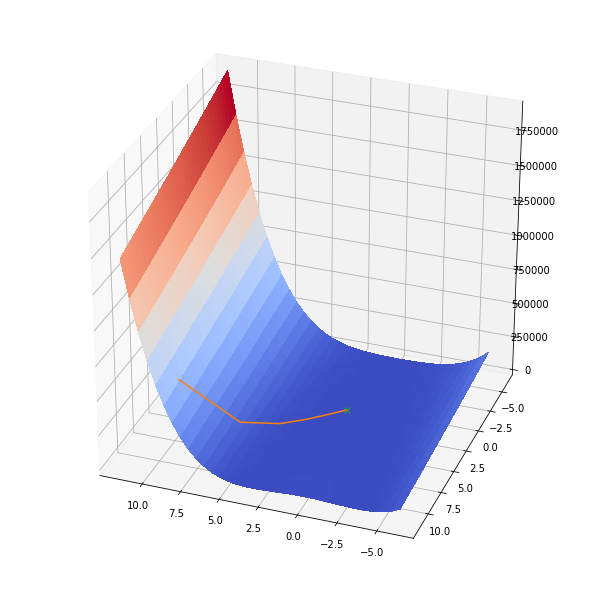

In [191]:
difference = 10
"""the below lines of code plotthe function"""
fig = plt.figure(figsize=(10.5, 10.5))

ax = fig.gca(projection='3d')
"""changes the azimuth"""
ax.view_init(azim=110)

"""Make data for rosenbrock equation."""
X = np.arange(-6, 12, .5)
Y = np.arange(-6, 12, .5)
X, Y = np.meshgrid(X, Y)
Z = 100 * (Y - X**2) **2 + (1 - X)**2

"""Plot the surface of rosenbrock equation, with our data"""
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       antialiased=False)

  
"""instantiate first order derivative with our initial starting point, x"""
first_order = 400 * x**3 - 600 * x **2 + 202 * x - 2
"""instantiate second order derivative with our initial starting point, x"""
second_order = 1200 * x**2 - 1200 * x +202
li = []
first_orders = []
second_orders = []

while difference > 10**-10:
    li.append(x)
    first_orders.append(first_order)
    second_orders.append(second_order)
    x = x - (first_order/second_order)
    first_order = 400 * x**3 - 600 * x **2 + 202 * x - 2
    second_order = 1200 * x**2 - 1200 * x +202
    """calculates difference of previous and current x locations if X
    locations havn't changed, we reached local minimum and loop will stop"""
    difference = abs(x - (x - (first_order/second_order)) )     
global x_values2
"""This variable is our gradient path in both the x and y direction in a numpy vector""" 
x_values2 = np.array(li)
"""This variable is our gradient path in z direction in a numpy vector"""
z = 100 * (x_values2 - x_values2**2) **2 + (1 - x_values2)**2
ax.plot(x_values2,x_values2,z)  

"""plots [1,1] which is our global minimum in the function"""
ax.plot([1],[1],[0], marker = 'x')

In [192]:
# first lets print out all of our iterations
print('x_values =', x_values2, '\n')

x_values = [ 9.          6.17309069  4.2917078   3.04230434  2.21668959  1.67736926
  1.33468898  1.13170253  1.03212459  1.00267059  1.00002093  1.        ] 



In [193]:
# Look at that!, it took us a whole 12 iterations to gt to our global minimum vs 
# the 9,000 plus for our gradient descent algorithm.
# lets check our our first and second derivatives and see what they were doing

In [194]:
print('first order derivatives = ', first_orders, '\n')
print('second order derivatives =', second_orders, '\n')

first order derivatives =  [244816, 72476.0420877124, 21432.838661335387, 6322.535976542258, 1854.4140043599825, 536.4447540722497, 149.81350328273123, 37.92502596720442, 7.121621030927372, 0.5437451174277612, 0.004227473219401645, 2.627327830850845e-07] 

second order derivatives = [86602, 38522.74958251705, 17154.45762066503, 7657.973625597609, 3438.42777813462, 1565.4380489887917, 738.046825245028, 380.8577020853211, 241.78789190821476, 205.21326110051837, 202.02511266684814, 202.00000156078886] 



In [195]:
# If you think about these derivatives intuitively, it makes sense that a small
# first derivative, and a huge second derivative, should cause the gradient to move 
# very slowly so it doesnt overshoot its optimum location. Vice versa, a large 
# first derivative and a small second derivate should cause our gradient to move
# in much larger steps. Lets go ahead and run this bad boy one more time, but lets
# increase our starting x location to 20
x = 20

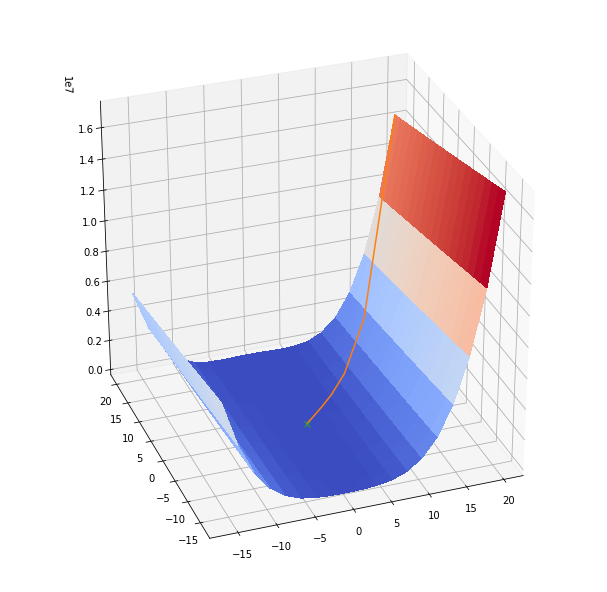

In [196]:
difference = 10
"""the below lines of code plotthe function"""
fig = plt.figure(figsize=(10.5, 10.5))

ax = fig.gca(projection='3d')
"""changes the azimuth"""
ax.view_init(azim=250)

"""Make data for rosenbrock equation."""
X = np.arange(-16, 21, 2)
Y = np.arange(-16, 21, 2)
X, Y = np.meshgrid(X, Y)
Z = 100 * (Y - X**2) **2 + (1 - X)**2

"""Plot the surface of rosenbrock equation, with our data"""
ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       antialiased=False)

  
"""instantiate first order derivative with our initial starting point, x"""
first_order = 400 * x**3 - 600 * x **2 + 202 * x - 2
"""instantiate second order derivative with our initial starting point, x"""
second_order = 1200 * x**2 - 1200 * x +202
li = []
first_orders = []
second_orders = []

while difference > 10**-10:
    li.append(x)
    first_orders.append(first_order)
    second_orders.append(second_order)
    x = x - (first_order/second_order)
    first_order = 400 * x**3 - 600 * x **2 + 202 * x - 2
    second_order = 1200 * x**2 - 1200 * x +202
    """calculates difference of previous and current x locations if X
    locations havn't changed, we reached local minimum and loop will stop"""
    difference = abs(x - (x - (first_order/second_order)) )     
global x_values2
"""This variable is our gradient path in both the x and y direction in a numpy vector""" 
x_values2 = np.array(li)
"""This variable is our gradient path in z direction in a numpy vector"""
z = 100 * (x_values2 - x_values2**2) **2 + (1 - x_values2)**2
ax.plot(x_values2,x_values2,z)  

"""plots [1,1] which is our global minimum in the function"""
ax.plot([1],[1],[0], marker = 'x')

In [197]:
print('x_values =', x_values2, '\n')
print('first order derivatives = ', first_orders, '\n')
print('second order derivatives =', second_orders, '\n')

x_values = [ 20.          13.50279481   9.17272397   6.28811156   4.36819521
   3.09300494   2.25005025   1.69894222   1.34805516   1.13910022
   1.0350959    1.00314999   1.00002905   1.        ] 

first order derivatives =  [2964038, 878091.6363646927, 260080.60440966272, 76997.63534454434, 22771.73700488076, 6718.694138384087, 1971.429750904516, 570.8774237243111, 159.85827386173054, 40.784140736782604, 7.845697003282936, 0.6422640861665059, 0.0058688171413905366, 5.063101866653597e-07] 

second order derivatives = [456202, 202789.20758801213, 90161.3691698712, 40104.68244924912, 17857.521020388627, 7970.409559687289, 3577.2110546173058, 1626.9549263454103, 765.0370671814239, 392.1389120962874, 245.59314938447005, 205.79189575608552, 202.03486226475866, 202.00000300778333] 

